In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('hyundai1.csv', sep=',')
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,1,2017.0,7999.0,1,17307.00000,2,145.0,58.9,1.2
1,10,2017.0,14100.0,2,27299.00000,0,145.0,57.6,1.7
2,0,2017.0,7495.0,1,25203.00000,2,30.0,57.7,1.2
3,6,2013.0,6998.0,1,72893.96871,0,145.0,53.3,1.7
4,10,2016.0,11998.0,1,36512.00000,0,30.0,61.7,1.7
...,...,...,...,...,...,...,...,...,...
330,10,2017.0,13000.0,1,26685.00000,0,30.0,61.7,1.7
331,9,2017.0,18999.0,0,20599.00000,0,150.0,42.8,2.2
332,10,2019.0,15498.0,1,23773.00000,2,145.0,34.9,1.6
333,5,2017.0,9998.0,1,9604.00000,2,145.0,50.4,1.4


In [3]:
X = df.iloc[:, [True,True,False,True,True,True,True,True,True]]
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X

,model,year,type,distance,fuel,tax,miles per galoon,size
0,1,2017.0,1,17307.00000,2,145.0,58.9,1.2
1,10,2017.0,2,27299.00000,0,145.0,57.6,1.7
2,0,2017.0,1,25203.00000,2,30.0,57.7,1.2
3,6,2013.0,1,72893.96871,0,145.0,53.3,1.7
4,10,2016.0,1,36512.00000,0,30.0,61.7,1.7
...,...,...,...,...,...,...,...,...
330,10,2017.0,1,26685.00000,0,30.0,61.7,1.7
331,9,2017.0,0,20599.00000,0,150.0,42.8,2.2
332,10,2019.0,1,23773.00000,2,145.0,34.9,1.6
333,5,2017.0,1,9604.00000,2,145.0,50.4,1.4


In [4]:
f1 = ['year']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

sr.coef_, sr.intercept_

(array([1456.39058312]), -2925633.897746495)

Линейная регрессия имеет вид Цена = 1456.39058312*Год-2925633.897746495

In [5]:
y_pred = sr.predict(X_test[f1])
sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.369, 0.278)

In [6]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(3061.14, 3567.96)

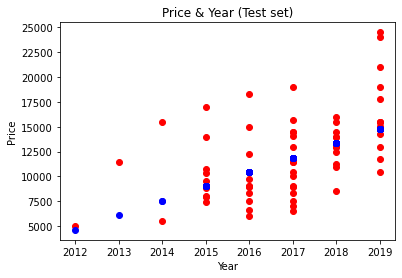

In [7]:
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], sr.predict(X_test[f1]), 'bo')
plt.title('Price & Year (Test set)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

График показал, чем моложе автомобиль, тем выше его цена

In [8]:
mr = LinearRegression().fit(X_train, y_train)
mr.score(X_train, y_train).round(3)

0.86

Коэффициент регрессии = 0.86

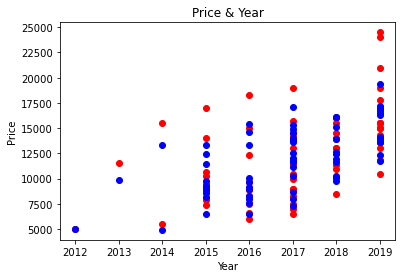

In [10]:
# Visualising the Test set results
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], mr.predict(X_test), 'bo')
plt.title('Price & Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [11]:
# Checking p-values
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     198.8
Date:                Tue, 28 Dec 2021   Prob (F-statistic):          6.87e-106
Time:                        01:53:18   Log-Likelihood:                -2329.8
No. Observations:                 268   AIC:                             4678.
Df Residuals:                     259   BIC:                             4710.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.056e+06   1.62e+05    -12.663      0.000   -2.38e+06   -1.74e+06
model              345.9799     27.517     12.573      0.000     291.794     400.166
year              1022.5397     80.441     12.712      0.000     864.138    1180.941
type              -420.6006    265.049     -1.587      0.114    -942.526     101.325
distance            -0.0667      0.008     -7.907      0.000      -0.083      -0.050
fuel              -360.7818    218.495     -1.651      0.100    -791.035      69.471
tax                  3.0321      1.838      1.650      0.100      -0.586       6.651
miles per galoon   -13.7424     13.547     -1.014      0.311     -40.420      12.935
size              3886.9774    544.066      7.144      0.000    2815.622    4958.332
==============================================================================
Omnibus:                       70.900   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.172
Skew:                           1.218   Prob(JB):                     1.24e-39
Kurtosis:                       6.179   Cond. No.                     5.20e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)

pr = LinearRegression().fit(X_train_p, y_train)

# Getting parameters
pr.coef_, pr.intercept_

(array([ 1.83424326e+08,  1.58267456e+04,  1.03303697e+05, -2.39800000e+06,
         6.09989919e+01, -6.95396405e+05, -4.09311935e+03, -3.72789914e+04,
        -3.05243535e+06, -4.35747587e+01, -5.76213407e+00, -2.10869358e+02,
         2.95129255e-03, -3.35928259e+02, -4.89718955e+00, -2.44922019e+01,
        -7.00491468e+02, -2.63674616e+01,  1.19381704e+03, -3.02591730e-02,
         3.50695888e+02,  2.17523190e+00,  1.91058487e+01,  1.48640676e+03,
         1.17094951e+03,  1.09374381e-01, -3.02650549e+03,  1.25439041e+01,
        -1.04344048e+02, -4.59738142e+03, -1.89522689e-06,  7.39587048e-03,
        -1.24572877e-04, -2.99306000e-04, -7.79998238e-03, -2.33639214e+03,
        -3.96570446e+01, -1.49651911e+02,  6.66094900e+03, -3.15835247e-01,
        -3.24031478e+00,  4.83286124e+00, -7.69929261e+00,  2.41420089e+02,
         1.56976123e+04]),
 -284538234.4326029)

In [13]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p)

# Coefficient of determination R^2
pr.score(X_train_p, y_train).round(3)

0.875

R^2 лучше для множественной линейной регресси.

In [14]:
# Mean squared error
mean_squared_error(y_train, pr.predict(X_train_p), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(1360.42, 1668.18)

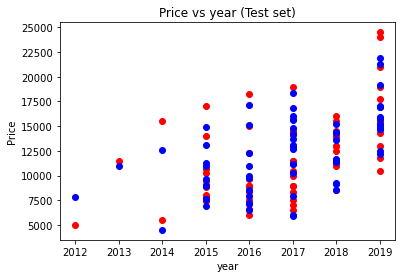

In [15]:
# Visualising the Test set results
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], pr.predict(X_test_p), 'bo')
plt.title('Price vs year (Test set)')
plt.xlabel('year')
plt.ylabel('Price')
plt.show()


In [16]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('hyundai2.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()